<a href="https://colab.research.google.com/github/trancenoid/GANs/blob/master/DOGGO_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
data_to_dl = pd.concat([ pd.read_csv('a1.csv', sep = '\t',header = None), 
                        pd.read_csv('a2.csv', sep = '\t',header = None), 
                        pd.read_csv('a3.csv', sep = '\t',header = None),
                        pd.read_csv('a4.csv', sep = '\t',header = None), 
                        pd.read_csv('a5.csv', sep = '\t',header = None),
                       pd.read_csv('a6.csv', sep = '\t',header = None),
                       pd.read_csv('a7.csv', sep = '\t',header = None),
                       pd.read_csv('a8.csv', sep = '\t',header = None)])
data_to_dl.to_csv('img_links.csv', index = False, header = False)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2019-08-05 08:25:54--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  40.1MB/s    in 20s     

2019-08-05 08:26:14 (37.1 MB/s) - ‘images.tar’ saved [793579520/793579520]



In [0]:
!mkdir images
!mkdir data
!tar -xf images.tar -C './data'
!find ./data/ -type f -print0 | xargs -0 mv -t ./images

In [4]:
import pandas as pd 
import os
data = pd.DataFrame(os.listdir('./images'), columns = ['images'])
data.head()

,images
0,n02096177_4610.jpg
1,n02090622_7292.jpg
2,n02086240_1445.jpg
3,n02085620_500.jpg
4,n02091467_2366.jpg


In [5]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1./255)
X = datagen.flow_from_dataframe(data, directory = './images',x_col = 'images', target_size = (128,128), class_mode = None, batch_size = 20580)
X = X[0]

Using TensorFlow backend.


Found 20580 validated image filenames.


In [0]:

import keras
import os
from keras.layers import *
from keras import initializers
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.models import Model, Sequential
from google.colab.patches import cv2_imshow
from keras.datasets import cifar10
import cv2
import numpy as np
from tqdm import tqdm
def data_loader():
  X = np.empty((len(os.listdir('./data'))), dtype= np.object)
  for i,img in enumerate(tqdm(os.listdir('./data'))):
    imag = cv2.imread("./data/" + img)
    #X = np.append(X, imag.astype(np.float32)/255)
    X[i] = imag.astype(np.float32)
  return X
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#X_train = X_train[y_train[:,0]==1]
#X = (X_train - 127.5)/127.5
#X = (X_train)/255
#X = data_loader()
#

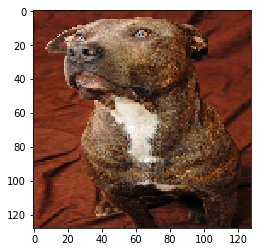

In [7]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
#img = image.array_to_img(X[5], scale=True)
plt.imshow(X[13])

In [8]:
adam = Adam(lr = 0.001, beta_1 = 0.5)
inShape = 100

def build_generator():
  generator = Sequential()
  generator.add(Dense(16*16*256,input_shape = (inShape,), activation = 'relu'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(Reshape((16,16,256)))
  
  generator.add(Conv2D(256, kernel_size = 5, padding = 'same'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(LeakyReLU(0.1))
  
  generator.add(Conv2DTranspose(256, strides = 2 ,kernel_size = 4, padding = 'same'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(LeakyReLU(0.1))
  
  generator.add(Conv2D(256, kernel_size = 5, padding = 'same'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(LeakyReLU(0.1))
  
  generator.add(Conv2DTranspose(256, strides = 2 ,kernel_size = 4, padding = 'same'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(LeakyReLU(0.1))
  
  generator.add(Conv2D(256, kernel_size = 5, padding = 'same'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(LeakyReLU(0.1))
  
  generator.add(Conv2DTranspose(256, strides = 2 ,kernel_size = 4, padding = 'same'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(LeakyReLU(0.1))
  
  generator.add(Conv2D(256, kernel_size = 5, padding = 'same'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(LeakyReLU(0.1))
  
  generator.add(Conv2D(3, kernel_size = 5, padding = 'same', activation = 'tanh'))
  generator.compile(loss = 'binary_crossentropy', optimizer = adam)
  return generator

def build_discriminator():
  D = Sequential()
  D.add(Conv2D(256, kernel_size = 3, padding = 'same', 
               input_shape = (128,128,3)))
  D.add(BatchNormalization(momentum = 0.9))
  D.add(LeakyReLU(0.1))
  D.add(Conv2D(256, 4, strides = 2, padding = 'same'))
  D.add(BatchNormalization(momentum = 0.9))
  D.add(LeakyReLU(0.1))
  D.add(Conv2D(256, kernel_size = 4, strides = 2, padding = 'same'))
  D.add(BatchNormalization(momentum = 0.9))
  D.add(LeakyReLU(0.1))
  D.add(Conv2D(256, kernel_size = 4, strides = 2, padding = 'same'))
  D.add(BatchNormalization(momentum = 0.9))
  D.add(LeakyReLU(0.1))
  D.add(Conv2D(256, kernel_size = 4, strides = 2, padding = 'same'))
  D.add(BatchNormalization(momentum = 0.9))
  D.add(LeakyReLU(0.1))
  D.add(Conv2D(256, kernel_size = 4, strides = 2, padding = 'same'))
  D.add(BatchNormalization(momentum = 0.9))
  D.add(LeakyReLU(0.1))
  D.add(Flatten())
  D.add(Dropout(0.4))
  
  D.add(Dense(1, activation = 'sigmoid'))
  D.compile(loss = 'binary_crossentropy', optimizer = adam)
  
  return D

G = build_generator()
D = build_discriminator()

D.trainable = False
ganIn = Input(shape = (inShape,))
genOut = G(ganIn)
ganOut = D(genOut)
GAN = Model(inputs = ganIn, outputs = ganOut)


GAN.compile(loss = 'binary_crossentropy', optimizer = adam)
  
  
 

W0805 08:27:41.553313 140029459396480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 08:27:41.556213 140029459396480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 08:27:41.559564 140029459396480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 08:27:41.690551 140029459396480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0805 08:27:41.770955 

In [0]:
G.summary()
D.summary()
#GAN.summary()

In [0]:
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:../lib/x86_64-linux-gnu/

In [0]:
from keras.models import load_model
dLosses = []
gLosses = []
img_noise = np.random.rand(*X.shape)
# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('dcgan_loss_epoch_%d.png' % epoch)
def generate_noise(n_samples, noise_dim):
  X = np.random.normal(0, 1, size=(n_samples, noise_dim))
  return X

# Create a wall of generated MNIST images
def show_imgs(batchidx):
  
  noise = generate_noise(9, 100)
  gen_imgs = G.predict(noise)

  fig, axs = plt.subplots(3, 3)
  count = 0
  for i in range(3):
    for j in range(3):
      # Dont scale the images back, let keras handle it
      img = image.array_to_img(gen_imgs[count], scale=True)
      axs[i,j].imshow(img)
      axs[i,j].axis('off')
      count += 1
  plt.show()
  plt.close()  

# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
  G.save('drive/My Drive/colab/doggo_dcgan_generator_epoch_%d.h5' % epoch)
  D.save('drive/My Drive/colab/doggo_dcgan_discriminator_epoch_%d.h5' % epoch)
def loadModels(epoch):
  G = load_model('drive/My Drive/colab/doggo_dcgan_generator_epoch_%d.h5' % epoch)
  D = load_model('drive/My Drive/colab/doggo_dcgan_discriminator_epoch_%d.h5' % epoch)

def train(epochs=1, BATCH_SIZE=16, resume_epoch = -1):
  if(resume_epoch != -1):
    loadModels(resume_epoch)
  num_batches = int(X.shape[0]/BATCH_SIZE)
  N_EPOCHS = epochs
  for epoch in range(resume_epoch, resume_epoch + N_EPOCHS):

    cum_d_loss = 0.
    cum_g_loss = 0.

    for batch_idx in tqdm(range(num_batches)):
      # Get the next set of real images to be used in this iteration
      images = X[batch_idx*BATCH_SIZE : (batch_idx+1)*BATCH_SIZE]

      noise_data = generate_noise(BATCH_SIZE, 100)
      generated_images = G.predict(noise_data)

      # Train on soft labels (add noise to labels as well)
      noise_prop = 0.05 # Randomly flip 5% of labels

      # Prepare labels for real data
      true_labels = np.zeros((BATCH_SIZE, 1)) + np.random.uniform(low=0.0, high=0.1, size=(BATCH_SIZE, 1))
      flipped_idx = np.random.choice(np.arange(len(true_labels)), size=int(noise_prop*len(true_labels)))
      true_labels[flipped_idx] = 1 - true_labels[flipped_idx]
      D.trainable = True  
      # Train discriminator on real data
      d_loss_true = D.train_on_batch(images, true_labels)

      # Prepare labels for generated data
      gene_labels = np.ones((BATCH_SIZE, 1)) - np.random.uniform(low=0.0, high=0.1, size=(BATCH_SIZE, 1))
      flipped_idx = np.random.choice(np.arange(len(gene_labels)), size=int(noise_prop*len(gene_labels)))
      gene_labels[flipped_idx] = 1 - gene_labels[flipped_idx]

      # Train discriminator on generated data
      d_loss_gene = D.train_on_batch(generated_images, gene_labels)
      D.trainable = False
      d_loss = 0.5 * np.add(d_loss_true, d_loss_gene)
      cum_d_loss += d_loss

      # Train generator
      noise_data = generate_noise(BATCH_SIZE, 100)
      g_loss = GAN.train_on_batch(noise_data, np.zeros((BATCH_SIZE, 1)))
      cum_g_loss += g_loss
    print('  Epoch: {}, Generator Loss: {}, Discriminator Loss: {}'.format(epoch+1, cum_g_loss/num_batches, cum_d_loss/num_batches))
    show_imgs("epoch" + str(epoch))
    saveModels(epoch)
if __name__ == '__main__':  
  train(50, 16, 9)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '
 44%|████▍     | 566/1286 [23:45<29:57,  2.50s/it]

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


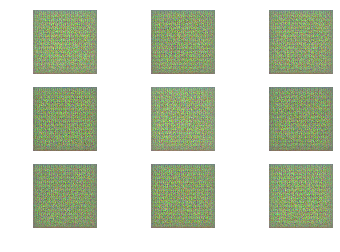

In [20]:
#loadModels(5)
show_imgs(5)

In [0]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda=9.0.176-1

--2019-08-04 08:18:24--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?CC2brS5OdxLd1X-U_JKpoQwCexaAVd8cjORVsj4PTZCUC5lVk8T3tVeuIDWBG6bliiBLyxD8SSbLOMu7OvJ9MLafFpmaRoQ5Y3ariSbFyATJ1M76YhpwHcWqsuBlfYGokEud2CAP3giS-S8Oa3QzSuJfaIBcoQW1vzSey-Ky0WLI3BOj-N0LRuNliPdhFEL-Tb5ai6Z0y9GRLyuL5cUR [following]
--2019-08-04 08:18:25--  https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?CC2brS5OdxLd1X-U_JKpoQwCexaAVd8cjORVsj4PTZCUC5lVk8T3tVeuIDWBG6bliiBLyxD8SSbLOMu7OvJ9MLafFpmaRoQ5Y3ariSbFyATJ1M

KeyboardInterrupt: ignored